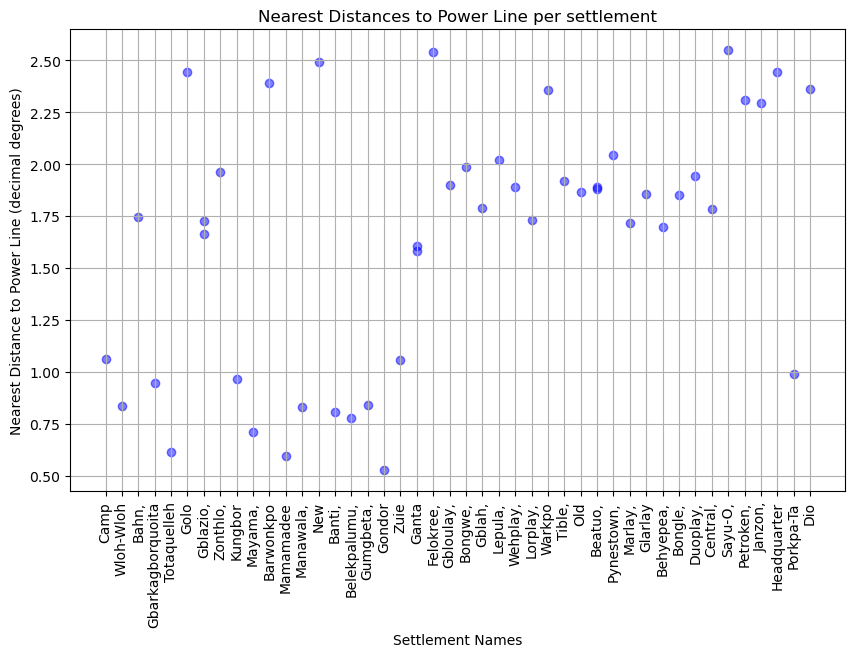

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19636\2824720325.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  locations['geometry'] = locations['geometry'].centroid# Convert geometries to Point


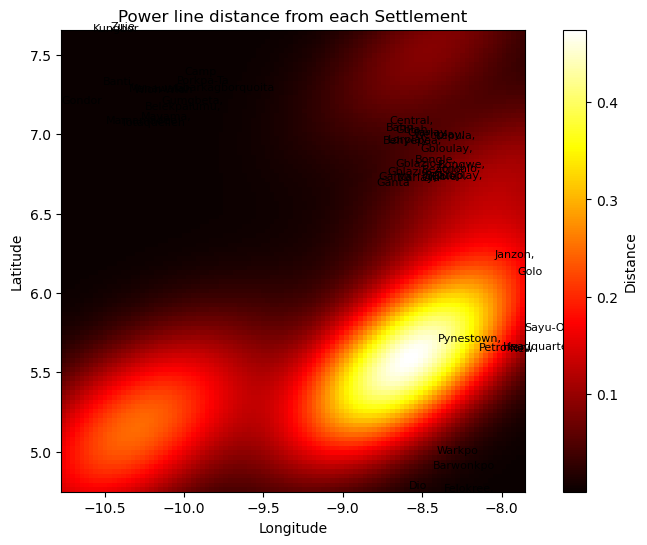

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np  
from scipy.stats import gaussian_kde
locations = gpd.read_file('C:/Users/Lenovo/Downloads/FANCY DOCS/VIDA INTERVIEW/shapefiles/geocoded_locations.shp')
power_line = gpd.read_file('C:/Users/Lenovo/Downloads/FANCY DOCS/VIDA INTERVIEW/Liberia electric transmission network 2023/Liberia_Powerline.shp')
# distance for each location
nearest_distances = []
for index, location in locations.iterrows():
    point = location.geometry.centroid
    nearest_distances.append(nearest_distance_to_power_line(point, power_line))
locations['nearest_distance_to_power_line'] = nearest_distances# Add nearest distances to the locations GeoDataFrame
def nearest_distance_to_power_line(point, line_gdf):# Function to calculate nearest distance from a point to a MultiLineString
    return point.distance(line_gdf.geometry.unary_union)
# Plot nearest distances against display names
plt.figure(figsize=(10, 6))
plt.scatter(locations['Settlement'], nearest_distances, color='blue', alpha=0.5)
plt.title('Nearest Distances to Power Line per settlement')
plt.xlabel('Settlement Names')
plt.ylabel('Nearest Distance to Power Line (decimal degrees)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
locations['geometry'] = locations['geometry'].centroid# Convert geometries to Point
# Extract x and y coordinates from the geometry
x = locations.geometry.x
y = locations.geometry.y
# Calculate the kernel density estimate
kde = gaussian_kde([x, y])
# Create a grid of points
x_grid, y_grid = np.meshgrid(np.linspace(x.min(), x.max(), 100),
                              np.linspace(y.min(), y.max(), 100))
# Evaluate the KDE at each grid point
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
z = kde(positions)
# Plot heatmap
plt.figure(figsize=(10, 6))
plt.imshow(z.reshape(x_grid.shape), cmap='hot', extent=[x.min(), x.max(), y.min(), y.max()])
# Annotate with settlement names
for idx, row in locations.iterrows():
    plt.text(row.geometry.x, row.geometry.y, row['Settlement'], fontsize=8, color='black')
plt.colorbar(label='Distance')
plt.title('Power line distance from each Settlement')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
